In [1]:
library(ROCR)
library(PRROC)
library(magrittr)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [2]:
results = readr::read_tsv("pred_res_for_roc.tsv")

Parsed with column specification:
cols(
  compound_id = col_character(),
  disease_id = col_character(),
  origin = col_character(),
  prior_logit = col_double(),
  prior_prob = col_double(),
  degree_CbG = col_double(),
  degree_DaG = col_double(),
  dwpc_CbGaD = col_double(),
  dwpc_CbGaDaGaD = col_double(),
  dwpc_CbGbCbGaD = col_double(),
  dwpc_CbGbCtD = col_double(),
  dwpc_CtDtCtD = col_double(),
  predicted_value = col_double(),
  category = col_character(),
  n_curators = col_double(),
  n_resources = col_double(),
  true_label = col_integer()
)


In [3]:
dim(results)

[1] 16709    17

In [4]:
head(results)

compound_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_DaG,dwpc_CbGaD,dwpc_CbGaDaGaD,dwpc_CbGbCbGaD,dwpc_CbGbCtD,dwpc_CtDtCtD,predicted_value,category,n_curators,n_resources,true_label
DB00884,DOID:11476,holdout,-3.825,0.021360,-1.4200,0.2483,3.8660,-0.2986,-0.6473,4.639,5.4620,0.7381946,DM,3,2,1
DB01583,DOID:1459,holdout,-Inf,0.000000,0.8967,-0.5354,4.7880,-0.2269,3.3190,5.652,-0.2954,0.5862281,DM,3,3,1
DB00399,DOID:11476,holdout,-3.094,0.043370,-0.2547,0.2483,3.6380,-0.9471,-0.1689,3.886,4.6370,0.5706117,NA,NA,NA,0
DB00630,DOID:5408,holdout,-4.845,0.007803,-0.4542,-1.5250,-0.5141,-0.8001,-1.0140,5.611,5.0000,0.5702399,DM,3,2,1
DB00958,DOID:11054,holdout,-2.140,0.105300,0.7578,0.4546,4.3490,2.5150,3.2220,3.779,4.3680,0.5274253,NA,NA,NA,0
DB00515,DOID:11054,holdout,-2.140,0.105300,1.3250,0.4546,4.1380,2.5490,3.3990,3.909,4.6330,0.5258151,NA,NA,NA,0


---

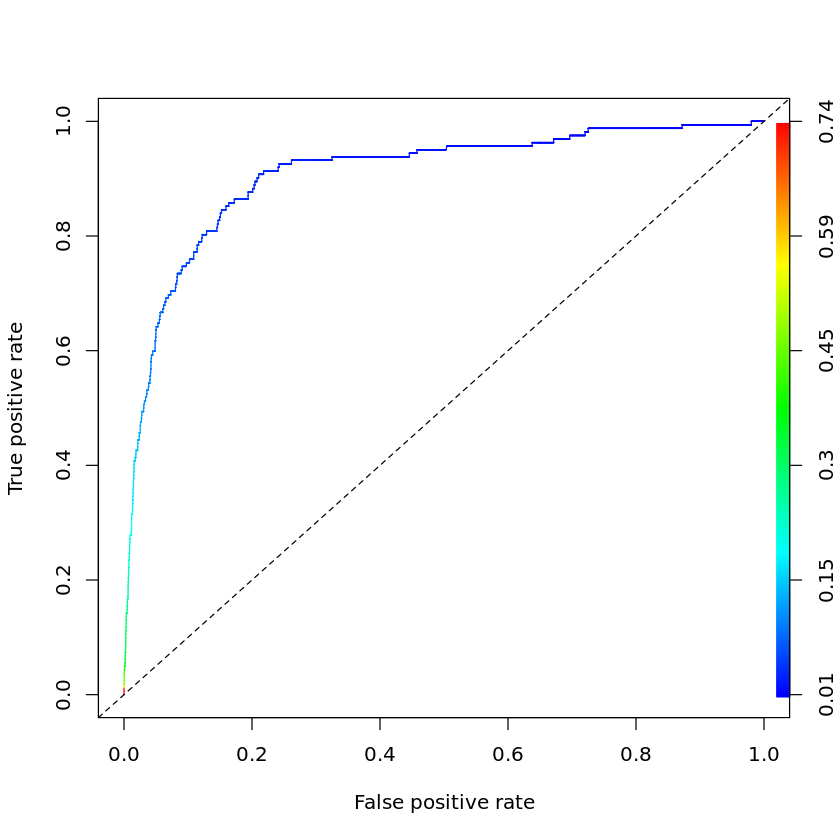

In [5]:
scores <- results$predicted_value

class <- results$true_label

pred <- prediction(scores, class)

perf <- performance(pred, measure = "tpr", x.measure = "fpr")

plot(perf, colorize = TRUE, colorkey = TRUE, colorkey.relwidth = 0.5, col = rainbow(10))
abline(a = "0", b = "1", lty = 2)

In [6]:
perf <- performance(pred, "auc")

In [7]:
auc <- slot(perf, "y.values")[[1]]

In [8]:
auc

[1] 0.9076872

In [9]:
perf <- performance(pred, "prec", "rec")

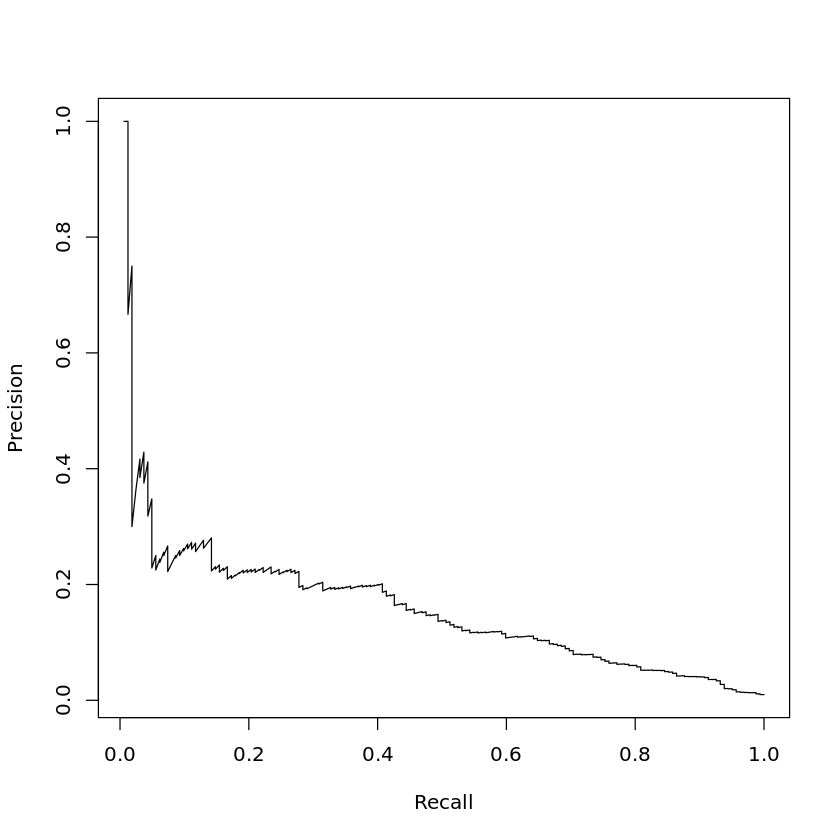

In [10]:
plot(perf)

---

In [11]:
good <- subset(results, true_label == 1)$predicted_value
bad <- subset(results, true_label == 0)$predicted_value

In [12]:
roc <- roc.curve(scores.class0 = good, scores.class1 = bad, curve = T)

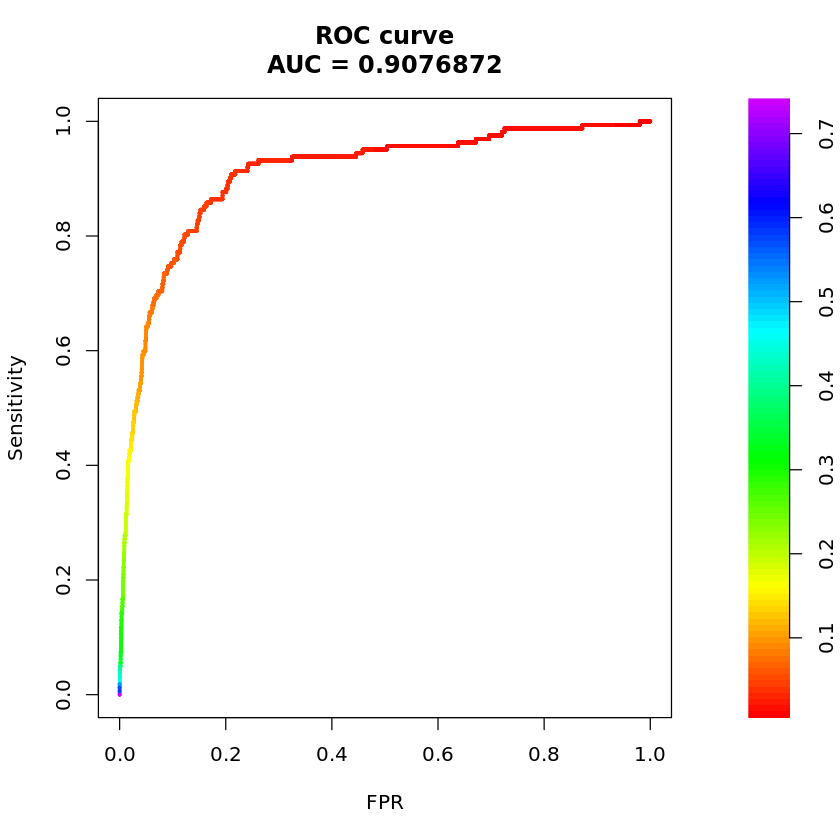

In [13]:
plot(roc)

In [14]:
pr <- pr.curve(scores.class0 = good, scores.class1 = bad, curve = T)

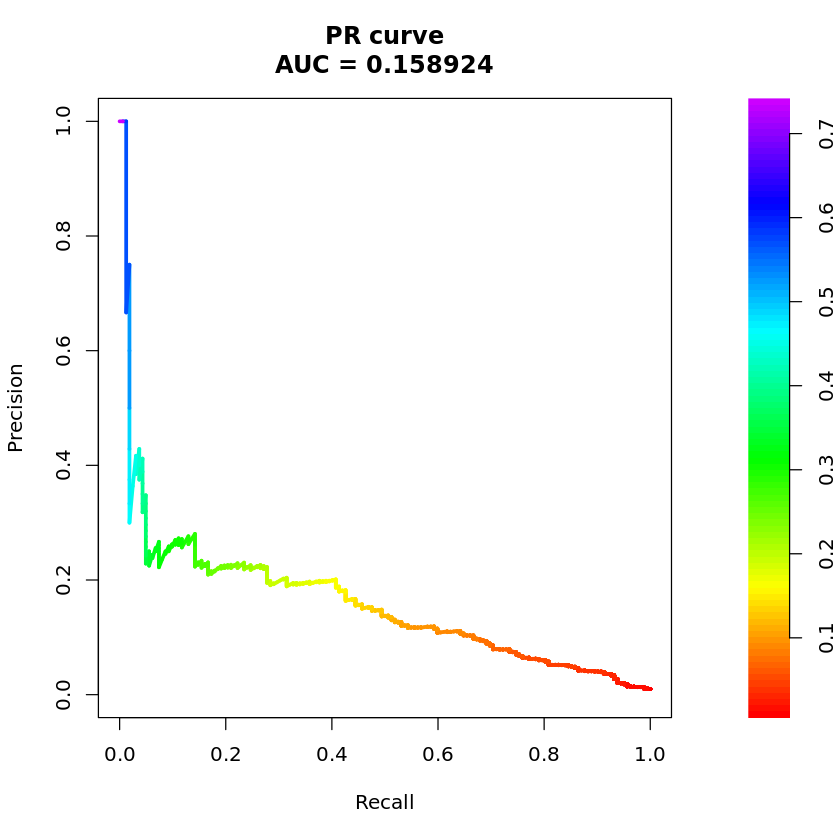

In [15]:
plot(pr)